# Practical Exam Notebook
In this notebook I have cleaned and preprocessed 'claims_prtexam.csv', the dataset provided by DataCamp as part of the Associate Data Analyst Exam case study. The visuals are created using the processed data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import re

## Data Validation
### Overview: 
The original dataset had 98 rows and 8 columns. Data types of columns: 4 String (object), 2 int64, 1 float64, 1 bool.
Each row had a unique identifier and none of the rows were dropped. 

In [2]:
df_claims = pd.read_csv('claims_prtexam.csv')
print(f'Unique values in the column "Cause" {df_claims["Cause"].unique()}')

# Find the frequency of different types of cases.
df_claims.groupby('Linked Cases')['Claim ID'].count()

Unique values in the column "Cause" [nan 'vegetables' 'meat']


Linked Cases
False    89
True      9
Name: Claim ID, dtype: int64

#### Claim ID: 
column has no missing values and all values are unique, as specified. I have modified the column values to make them shorter and improve readability during analysis. All the zeros were removed.

In [3]:
print(f'Orginal Claim ID value: {df_claims["Claim ID"].values[0]}')
def cleaner(id):
    return (id.str[11:15] + '.' + id.str[23:25])
df_claims['Claim ID'] = cleaner(df_claims['Claim ID'])
print("-"*50,'\nProcessed Claim ID values')
df_claims.loc[0:5,'Claim ID']

Orginal Claim ID value: 0000000-00.2010.0.00.0094
-------------------------------------------------- 
Processed Claim ID values


0    2010.94
1    2011.86
2    2012.92
3    2013.96
4    2014.97
5    2014.77
Name: Claim ID, dtype: object

#### Time to Close
Has negative value(s). I thought the most probable reason for this error would be a typing mistake, so I decided to remove the negative sign.
#### Individuals on Claim
int64 to int32. Save space, faster processing

In [4]:
df_claims['Time to Close'] = df_claims['Time to Close'].astype('int32')
df_claims['Time to Close'] = df_claims['Time to Close'].apply(lambda x : x*-1 if (x < 0) else x)
df_claims['Individuals on Claim'] = df_claims['Individuals on Claim'].astype('int32')

#### Location
No missing values. Changed dtype to category for efficient storage and processing.

In [5]:
df_claims['Location'].unique()
df_claims['Location'] = df_claims['Location'].astype('category')

#### Linked Cases
Has binary values only and none of the values in the column are missing.
#### Cause
Should have 3 values only- 'vegetable','meat','unknown'. As instructed in the data dictionary, missing values have been replaced with 'unknown'. dtype changed to category.

In [6]:
df_claims.fillna({'Cause':'unknown'}, inplace=True)
df_claims['Cause'] = df_claims['Cause'].astype('category')
df_claims['Cause'].isnull().sum()


0

#### Claim Amount
Extracted only the numeric part of the value as specified. Converted dtype to int32 as it is a numeric column. Column had no missing values.

In [7]:
print('sample original Claim_Amount values')
print(df_claims.loc[0:3, "Claim Amount"])
def transform_amount(amt):
    amt["Claim Amount"] = amt["Claim Amount"].str.extract('(\d.+)\.')
    amt["Claim Amount"] = amt["Claim Amount"].str.replace(',','')
    amt["Claim Amount"] = amt["Claim Amount"].astype('int32')
    return amt["Claim Amount"]
df_claims["Claim Amount"] = transform_amount(df_claims)

print('-'*35,'\nProcessed Claim_Amount values')
df_claims.loc[0:3, "Claim Amount"]


sample original Claim_Amount values
0     R$50,000.00
1    R$180,000.00
2     R$70,000.00
3     R$95,104.00
Name: Claim Amount, dtype: object
----------------------------------- 
Processed Claim_Amount values


0     50000
1    180000
2     70000
3     95104
Name: Claim Amount, dtype: int32

#### Individuals on Claim
No missing values. Surprisingly, there are 7 rows in which the number of individuals on the claim is equal to 0. 
Either these rows are invalid or incorrect values have been entered for this specific column; or there is some other way a claim can be registered. Nevertheless, I decided not to remove these rows; the dataset is already relatively small.

In [8]:
df_claims[['Time to Close','Claim Amount','Amount Paid','Individuals on Claim']].describe()

,Time to Close,Claim Amount,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000,98.000000
mean,833.510204,122952.030612,58448.238571,4.908163
std,685.424441,166433.389040,87525.873849,7.292259
min,29.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


In [9]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Claim ID              98 non-null     object  
 1   Time to Close         98 non-null     int64   
 2   Claim Amount          98 non-null     int32   
 3   Amount Paid           98 non-null     float64 
 4   Location              98 non-null     category
 5   Individuals on Claim  98 non-null     int32   
 6   Linked Cases          98 non-null     bool    
 7   Cause                 98 non-null     category
dtypes: bool(1), category(2), float64(1), int32(2), int64(1), object(1)
memory usage: 3.8+ KB


In [10]:
#Write processed data to a CSV.
df_claims.to_csv('proc_claims.csv')
#Print first rows of this dataset.
df_claims.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,2010.94,2082,50000,34297.47,RECIFE,2,False,unknown
1,2011.86,3591,180000,56383.54,SAO LUIS,7,False,unknown
2,2012.92,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,2013.96,1143,95104,29217.16,FORTALEZA,4,False,unknown
4,2014.97,117,29000,12610.50,FORTALEZA,1,False,meat


## Data Visualization
Using different visuals to answer the business questions
### How does the number of claims differ across locations?
Most claims were registered in SAO LUIS(30), followed by RECIFE(25). In all locations, more than 20 claims were made, so in terms of total number of claims, the difference between Locations is not extraordinary. Nevertheless, the legal department should take a loot at outlets in SAO LUIS first.

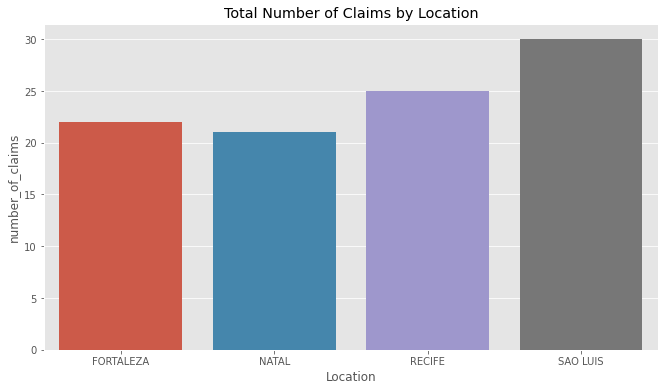

In [11]:
df_q1 = df_claims.groupby('Location').agg({'Claim ID' : 'count', 'Time to Close' : 'mean'})
df_q1.rename(columns={'Claim ID':'number_of_claims', 'Time to Close':'avg_ctime_per_claim(Days)'}, inplace=True)
df_q1.reset_index(inplace=True)
plt.figure(figsize=(11,6))
plt.style.use('ggplot')
plt.title('Total Number of Claims by Location')
sns.barplot(x='Location', y='number_of_claims', data=df_q1)
plt.show()

### What is the distribution of time to close claims?
Most of the claims are generally closed withn 1200 days, while a few of the claims took more than 1500 days. There are some outliers in the data as well. The legal team should focus on claims that took more than 1000 days first.

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


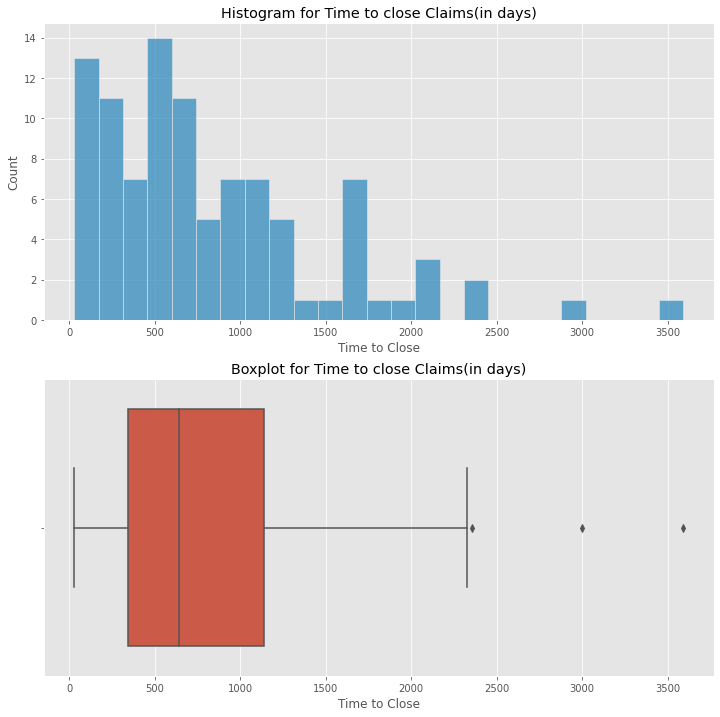

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Histogram for Time to close Claims(in days)')
sns.histplot(x='Time to Close', data=df_claims, bins=25)
plt.subplot(2,1,2)
plt.title('Boxplot for Time to close Claims(in days)')
sns.boxplot('Time to Close', data=df_claims)
plt.show()


### How does the average closing time for claims differ across locations?
To answer this question we need to find the average 'Time to Close' for each 'Location'.
Claims in SAO LUIS take the most time to close on average- more than 1000 days, around double the average time to close claims in NATAL. RECIFE comes second on the list, followed by FORTALEZA. As shown by the boxplot below , the data spread for 'Time to Close' is also largest for SAO LUIS, with a fair number of the claims taking more than 1500 days to close. In other locations, few cases/ claims cross this number.

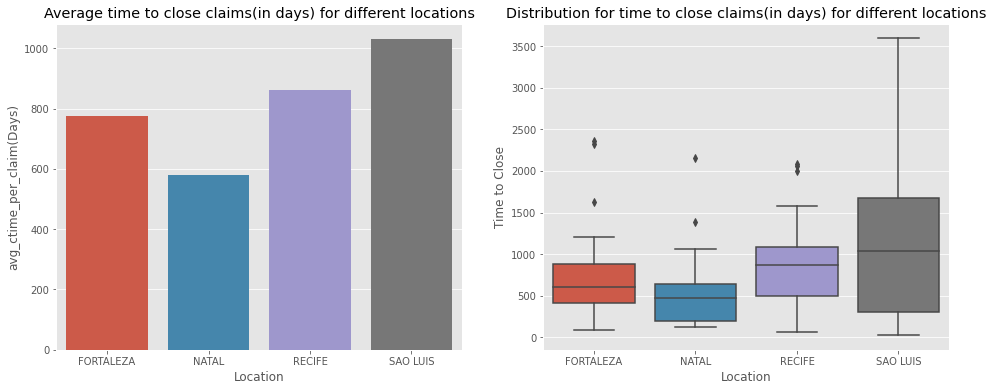

In [13]:
plt.figure(figsize=(16,6))
plt.style.use('ggplot')
plt.subplot(1,2,1)
plt.title("Average time to close claims(in days) for different locations")
sns.barplot(x='Location', y='avg_ctime_per_claim(Days)', data=df_q1)
df_claims = df_claims.sort_values('Location')
plt.subplot(1,2,2)
sns.boxplot(x='Location', y='Time to Close', data=df_claims)
plt.title("Distribution for time to close claims(in days) for different locations")
plt.show()

The legal team has been informed about the differences in the time it takes to close claims across locations. Our findings indicate that the situation is much worse in SAO LUIS, than in any other location. Whereas in NATAL, least number of claims were made and the average time to close down claims was the lowest.

    Location  Amount Paid
0  FORTALEZA    871041.62
1      NATAL   1858284.22
2     RECIFE   1159152.70
3   SAO LUIS   1839448.84


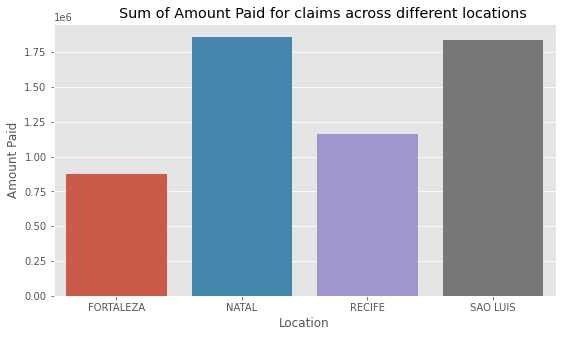

In [14]:
df_q2 = df_claims.groupby('Location').agg({'Amount Paid' : 'sum'})
df_q2.reset_index(inplace=True)
print(df_q2.head())
plt.figure(figsize=(9,5))
sns.barplot(x='Location', y='Amount Paid', data=df_q2)
plt.title('        Sum of Amount Paid for claims across different locations')
plt.show()
